In [117]:
import pandas as pd
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import ipywidgets as widgets
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [104]:
rcParams['figure.figsize'] = 10, 5

In [43]:
df = pd.read_pickle('tweets.pkl')

In [44]:
df.head()

,date,id,text,target
0,2019-11-07 11:04:45,ADRS,Post MTBPS2019 and the release of the second v...,[National Treasury]
1,2019-11-07 10:25:08,MBI Matseke Business Investment (PTY)LTD,Recap of mtbps2019,None
2,2019-11-07 10:09:35,Institute for Economic Justice,Some say austerity will make things worse some...,[Budget Justice Coalition SA]
3,2019-11-07 09:13:42,Equal Education,READ State spending cuts higher taxes doing mo...,None
4,2019-11-07 06:40:01,CapeTalk on 567AM,It would be irresponsible if the Reserve Bank ...,None


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 4 columns):
date      2293 non-null datetime64[ns]
id        2293 non-null object
text      2293 non-null object
target    766 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 71.8+ KB


In [46]:
analyser = SentimentIntensityAnalyzer()

In [47]:
# Example showcasing VADER sentiment analysis
print(df['text'][3])
print(analyser.polarity_scores(df['text'][3]))

READ State spending cuts higher taxes doing more harm than good Parly told MTBPS2019
{'neg': 0.297, 'neu': 0.546, 'pos': 0.157, 'compound': -0.4271}


In [48]:
def sentiment_analysis(tweet):
    sentiment = analyser.polarity_scores(tweet)['compound']
    if sentiment >= 0.05:
        return 1, 'positive'
    elif (sentiment < 0.05) and (sentiment > -0.05):
        return 0, 'neutral'
    else:
        return -1, 'negative'

In [49]:
df['sentiment_score'] = df['text'].apply(lambda x: sentiment_analysis(x)[0])
df['sentiment'] = df['text'].apply(lambda x: sentiment_analysis(x)[1])

In [50]:
df.head()

,date,id,text,target,sentiment_score,sentiment
0,2019-11-07 11:04:45,ADRS,Post MTBPS2019 and the release of the second v...,[National Treasury],1,positive
1,2019-11-07 10:25:08,MBI Matseke Business Investment (PTY)LTD,Recap of mtbps2019,None,0,neutral
2,2019-11-07 10:09:35,Institute for Economic Justice,Some say austerity will make things worse some...,[Budget Justice Coalition SA],1,positive
3,2019-11-07 09:13:42,Equal Education,READ State spending cuts higher taxes doing mo...,None,-1,negative
4,2019-11-07 06:40:01,CapeTalk on 567AM,It would be irresponsible if the Reserve Bank ...,None,1,positive


In [51]:
# Separate date and time
df['Day'] = df['date'].apply(lambda x: str(x).split(' ')[0])

In [52]:
df.head()

,date,id,text,target,sentiment_score,sentiment,Day
0,2019-11-07 11:04:45,ADRS,Post MTBPS2019 and the release of the second v...,[National Treasury],1,positive,2019-11-07
1,2019-11-07 10:25:08,MBI Matseke Business Investment (PTY)LTD,Recap of mtbps2019,None,0,neutral,2019-11-07
2,2019-11-07 10:09:35,Institute for Economic Justice,Some say austerity will make things worse some...,[Budget Justice Coalition SA],1,positive,2019-11-07
3,2019-11-07 09:13:42,Equal Education,READ State spending cuts higher taxes doing mo...,None,-1,negative,2019-11-07
4,2019-11-07 06:40:01,CapeTalk on 567AM,It would be irresponsible if the Reserve Bank ...,None,1,positive,2019-11-07


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
date               2293 non-null datetime64[ns]
id                 2293 non-null object
text               2293 non-null object
target             766 non-null object
sentiment_score    2293 non-null int64
sentiment          2293 non-null object
Day                2293 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 125.5+ KB


To check the number of sentiments in each category

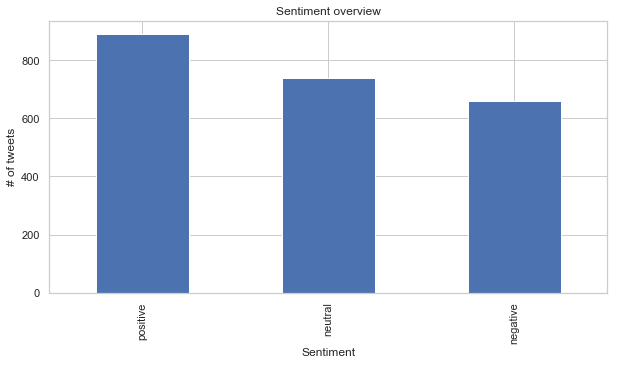

In [54]:
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment overview')
plt.ylabel('# of tweets')
plt.xlabel('Sentiment');

In [55]:
sns.set(style="whitegrid")

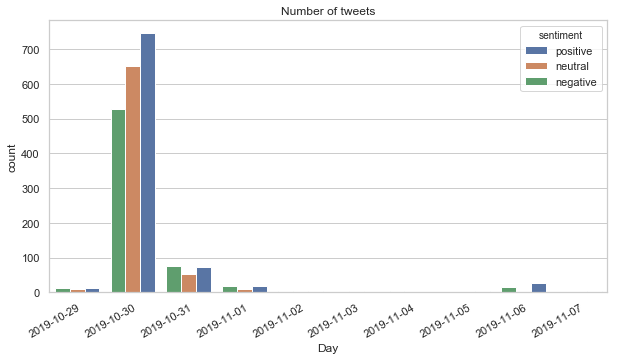

In [56]:
g = sns.countplot(x='Day', hue='sentiment', data=df)
plt.setp(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
plt.gca().invert_xaxis()
plt.title('Number of tweets');

### On the 30th of October 2019 was the day of the speech, which is why there was an increase in the number of tweets

In [66]:
# Focusing on that day
newdf = df[df['Day'] == '2019-10-30']

In [67]:
newdf['sentiment'].value_counts()

positive    745
neutral     652
negative    527
Name: sentiment, dtype: int64

In [69]:
# extract only the hour mark for the day
newdf['hour'] = df['date'].apply(lambda x: x.hour)

In [70]:
newdf.head()

,date,id,text,target,sentiment_score,sentiment,Day,hour
336,2019-10-30 22:40:56,voltron001,Older Lucie Villa SouthAfrica eskom MTBPS2019 ...,"[Moody's Investors Service, Moody's Analytics,...",0,neutral,2019-10-30,22
337,2019-10-30 21:21:33,Superior Invest,SA MTBPS2019 Finance Minister Tito Mboweni s f...,None,0,neutral,2019-10-30,21
338,2019-10-30 21:10:41,Sibongakonke Kheswa,Economy is a dire state Tough circumstances wi...,None,-1,negative,2019-10-30,21
339,2019-10-30 21:05:58,TTM,Im back wana help me to grow up ttm back free ...,None,1,positive,2019-10-30,21
340,2019-10-30 20:54:25,Sentient_Spirit,Why should taxpayers pay for the ANC govt fuck...,None,-1,negative,2019-10-30,20


In [71]:
# No need for the date and Day columns 
newdf.drop(['date','Day'], axis=1, inplace=True)

In [72]:
newdf.head()

,id,text,target,sentiment_score,sentiment,hour
336,voltron001,Older Lucie Villa SouthAfrica eskom MTBPS2019 ...,"[Moody's Investors Service, Moody's Analytics,...",0,neutral,22
337,Superior Invest,SA MTBPS2019 Finance Minister Tito Mboweni s f...,None,0,neutral,21
338,Sibongakonke Kheswa,Economy is a dire state Tough circumstances wi...,None,-1,negative,21
339,TTM,Im back wana help me to grow up ttm back free ...,None,1,positive,21
340,Sentient_Spirit,Why should taxpayers pay for the ANC govt fuck...,None,-1,negative,20


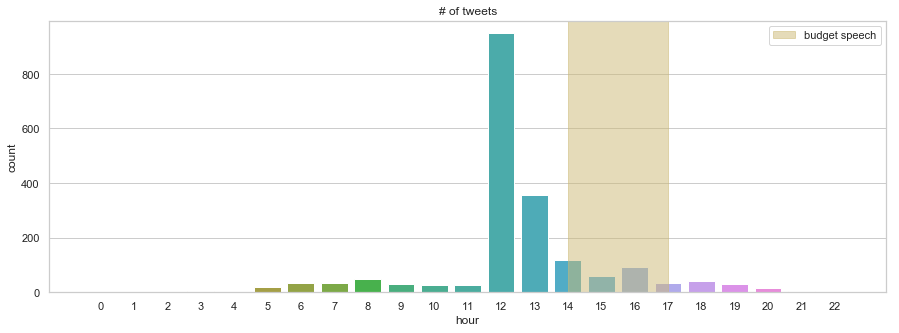

In [132]:
plt.figure(figsize=(15, 5))
sns.countplot(x='hour', data=newdf)
plt.axvspan(14, 17, color='y', alpha=0.5, label='budget speech')
plt.title('# of tweets')
plt.legend();

At midday there's a spike in the number of tweets indicative of the anticipitation of the budget speech